In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[213 213 212 ... 170 171 172]
 [213 213 213 ... 171 174 171]
 [213 214 214 ... 182 189 185]
 ...
 [218 220 227 ... 220 221 224]
 [213 220 227 ... 218 221 225]
 [213 222 227 ... 219 224 225]]


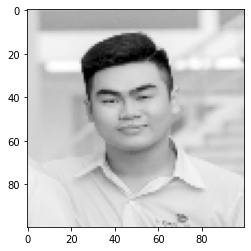

In [3]:
datadrive = "/content/drive/MyDrive/Bài tập AI/FaceID"
phanloai=['dinhtrong','thachpham','huyle']
img_size=100
for doituong in phanloai:
  path=os.path.join(datadrive,doituong)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE) #thay màu cho đối tượng
    new_array = cv.resize(img_array,(img_size,img_size)) #resize lại hình ảnh
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [4]:
#creating training data
training_data=[]
def create_traning_data():

  for doituong in phanloai:
    path = os.path.join(datadrive,doituong)
    class_num = phanloai.index(doituong)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 30/30 [00:18<00:00,  1.66it/s]

92


In [5]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (92, 100, 100, 1)
y (92,)


In [6]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/Bài tập AI/FaceID/save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/Bài tập AI/FaceID/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [8]:
pickle_in = open("/content/drive/MyDrive/Bài tập AI/FaceID/save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Bài tập AI/FaceID/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (92, 100, 100, 1)
y (92,)


In [9]:
y= to_categorical(y,3)

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))


In [11]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/30
2/2 [==============================] - 13s 739ms/step - loss: 7.2348 - accuracy: 0.3659 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 2/30
2/2 [==============================] - 0s 41ms/step - loss: 7.3582 - accuracy: 0.2439 - val_loss: 1.9111 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 42ms/step - loss: 1.1180 - accuracy: 0.4634 - val_loss: 1.6685 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 43ms/step - loss: 1.1854 - accuracy: 0.3902 - val_loss: 1.2543 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 0s 41ms/step - loss: 0.8625 - accuracy: 0.7439 - val_loss: 1.5531 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 0s 40ms/step - loss: 0.7525 - accuracy: 0.5854 - val_loss: 1.6225 - val_accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 0s 44ms/step - loss: 0.4970 - accuracy: 0.7683 - val_loss: 1.4502 - val_accuracy: 0.1000
Epoch

In [12]:
model.save('baitapfaceid.h5')

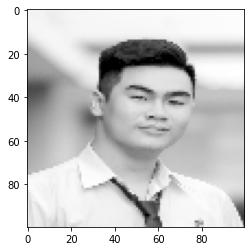

In [13]:
img_test='/content/drive/MyDrive/Bài tập AI/FaceID/dinhtrong/trong6.png'
categories=['dinhtrong','thachpham','huyle']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

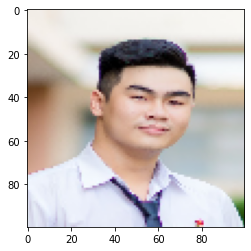

Prediction value: dinhtrong


In [14]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value:',categories[int(np.argmax(prediction))])

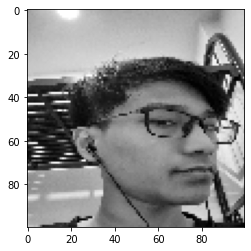

In [15]:
img_test='/content/drive/MyDrive/Bài tập AI/FaceID/thachpham/20220520_134113.jpg'
categories=['dinhtrong','thachpham','huyle']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

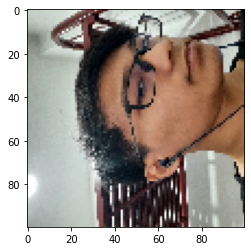

Prediction value: thachpham


In [16]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value:',categories[int(np.argmax(prediction))])

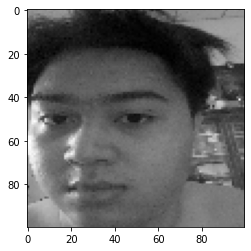

In [17]:
img_test='/content/drive/MyDrive/Bài tập AI/FaceID/huyle/19.JPG'
categories=['dinhtrong','thachpham','huyle']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

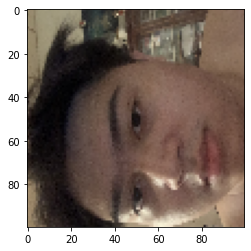

Prediction value: huyle


In [18]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value:',categories[int(np.argmax(prediction))])

[[0. 0. 1.]]
expectation huyle


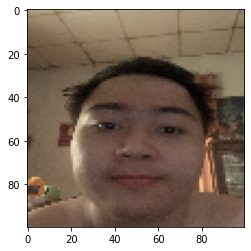

In [20]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'dinhtrong',
          1: 'thachpham',  
          2: 'huyle',  
          }
model = load_model('baitapfaceid.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/FaceID/test data/huyle1234.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 1.]]
expectation huyle


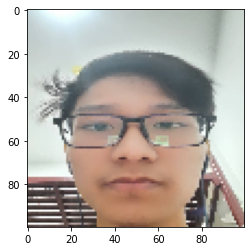

In [21]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'dinhtrong',
          1: 'thachpham',  
          2: 'huyle',  
          }
model = load_model('baitapfaceid.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/FaceID/test data/thach1234.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[1. 0. 0.]]
expectation dinhtrong


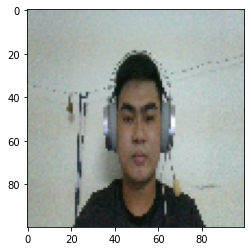

In [22]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'dinhtrong',
          1: 'thachpham',  
          2: 'huyle',  
          }
model = load_model('baitapfaceid.h5')
	# load model
img = load_image('/content/drive/MyDrive/Bài tập AI/FaceID/test data/trong.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 